#**Decision Trees for Swine Flu Detection**
---

<br>**Dataset Explanation:** We will work on a Swine Flu dataset that tells us if a person has the flu or not based on the symptoms he/she is experiencing. The columns in this dataset are:<br>
* Chills: A feature telling if the person has chills or not.
* Runny nose: A feature telling if the person has a runny nose or not.
* Headache: A feature telling the level of headache that a person is experiencing (It could be Miild, Moderate, or No headache).
* Fever: A feature telling if the person has fever or not.
* Flu: The target value that tells us if the person has the flu or not.

------------------------------------------------------------------------

#**Importing Librarires**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [25]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Loading the Dataset**

In [26]:
df = pd.read_csv("/content/drive/My Drive/SDAIA/flu.csv")
df.head()

,Chills,runny nose,head ache,fever,Flu
0,Y,N,Mild,Y,N
1,Y,Y,No,N,Y
2,Y,N,Strong,Y,Y
3,N,Y,Mild,Y,Y
4,N,N,No,N,N


In [27]:
df.rename(columns={'head ache': 'headache'}, inplace=True)

In [28]:
df.head(1)

,Chills,runny nose,headache,fever,Flu
0,Y,N,Mild,Y,N


# **EDA**

In [29]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Chills      8 non-null      object
 1   runny nose  8 non-null      object
 2   headache    8 non-null      object
 3   fever       8 non-null      object
 4   Flu         8 non-null      object
dtypes: object(5)
memory usage: 448.0+ bytes


(8, 5)

In [30]:
df.describe().T

,count,unique,top,freq
Chills,8,2,Y,4
runny nose,8,2,Y,5
headache,8,3,Mild,3
fever,8,2,Y,5
Flu,8,2,Y,5


In [31]:
df.dtypes

Chills        object
runny nose    object
headache      object
fever         object
Flu           object
dtype: object

In [32]:
df.nunique()

Chills        2
runny nose    2
headache      3
fever         2
Flu           2
dtype: int64

**Is there any null values?**

In [33]:
df.isnull().sum().any()

False

**Is there any duplicated values?**

In [34]:
df.duplicated().sum()

0

#**Visualization**


In [35]:
df["Flu"].value_counts()

Y    5
N    3
Name: Flu, dtype: int64

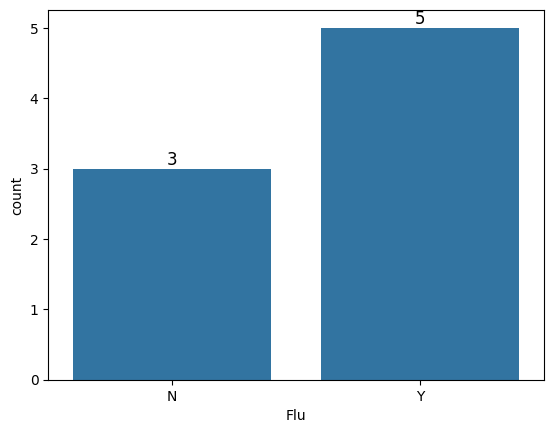

In [36]:
ax = sns.countplot(x = "Flu", data=df)

for i in ax.containers:
    ax.bar_label(i, size=12)

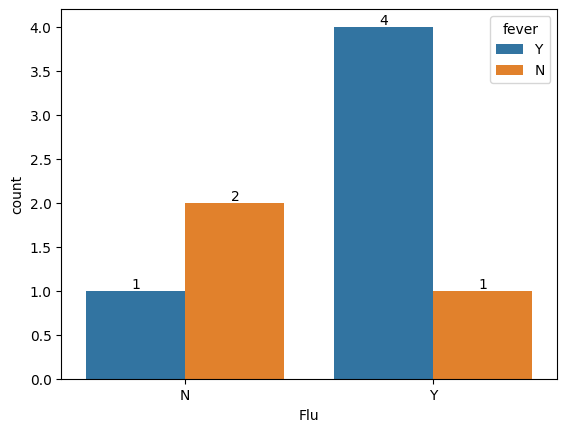

In [37]:
ax = sns.countplot(x="Flu", hue="fever", data = df)
for p in ax.containers:
    ax.bar_label(p)

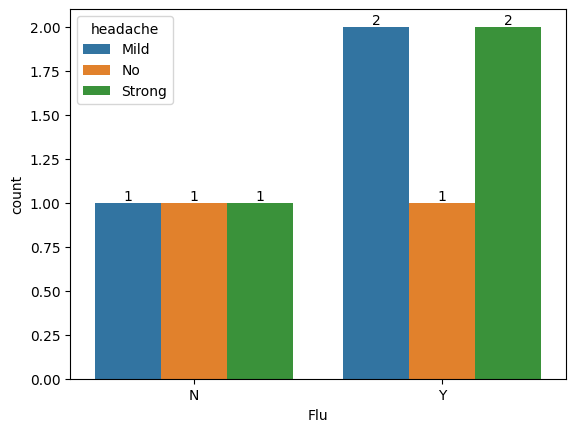

In [38]:
ax = sns.countplot(x="Flu", hue="headache", data = df)
for p in ax.containers:
    ax.bar_label(p)

<Figure size 1200x600 with 0 Axes>

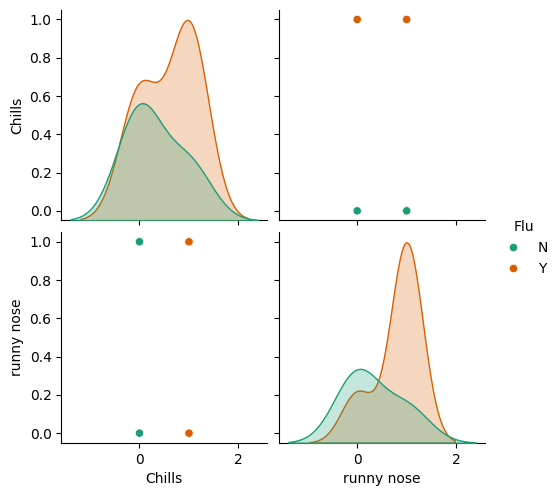

In [40]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='Flu',palette='Dark2')

#**Dataset Preprocessing**

### **Converting Categorical Features to Numerical**

In [43]:
encoder = preprocessing.LabelEncoder()
df['Chills'] = encoder.fit_transform(df['Chills'])
df['runny nose'] = encoder.fit_transform(df['runny nose'])
df['headache'] = encoder.fit_transform(df['headache'])
df['fever'] = encoder.fit_transform(df['fever'])
df['Flu'] = encoder.fit_transform(df['Flu'])

df.head(8)

,Chills,runny nose,headache,fever,Flu
0,1,0,0,1,0
1,1,1,1,0,1
2,1,0,2,1,1
3,0,1,0,1,1
4,0,0,1,0,0
5,0,1,2,1,1
6,0,1,2,0,0
7,1,1,0,1,1


---

#**Decision Trees**

**Question 1:** Import DecisionTreeClassifier, prepare X and Y, and fit your classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
# Prepare X and y
X=df.drop("Flu",axis=1)
Y=df['Flu']

In [47]:
# Initialize the DecisionTreeClassifier
lm = DecisionTreeClassifier()
# Fit the classifier
lm.fit(X, Y)

DecisionTreeClassifier()

##**Printing Text Structure of the tree**

**Question 2:** Check how you can print the text structure of the built tree using sklearn lirary






In [49]:
from sklearn.tree import export_text
tree = export_text(lm, feature_names=['Chills', 'runny nose', 'headache', 'fever'])
print(tree)

|--- fever <= 0.50
|   |--- Chills <= 0.50
|   |   |--- class: 0
|   |--- Chills >  0.50
|   |   |--- class: 1
|--- fever >  0.50
|   |--- runny nose <= 0.50
|   |   |--- headache <= 1.00
|   |   |   |--- class: 0
|   |   |--- headache >  1.00
|   |   |   |--- class: 1
|   |--- runny nose >  0.50
|   |   |--- class: 1



##**Plotting the tree to see its structure**

**Question 3:** Plot the tree structure to see nodes and gini index at the nodes level

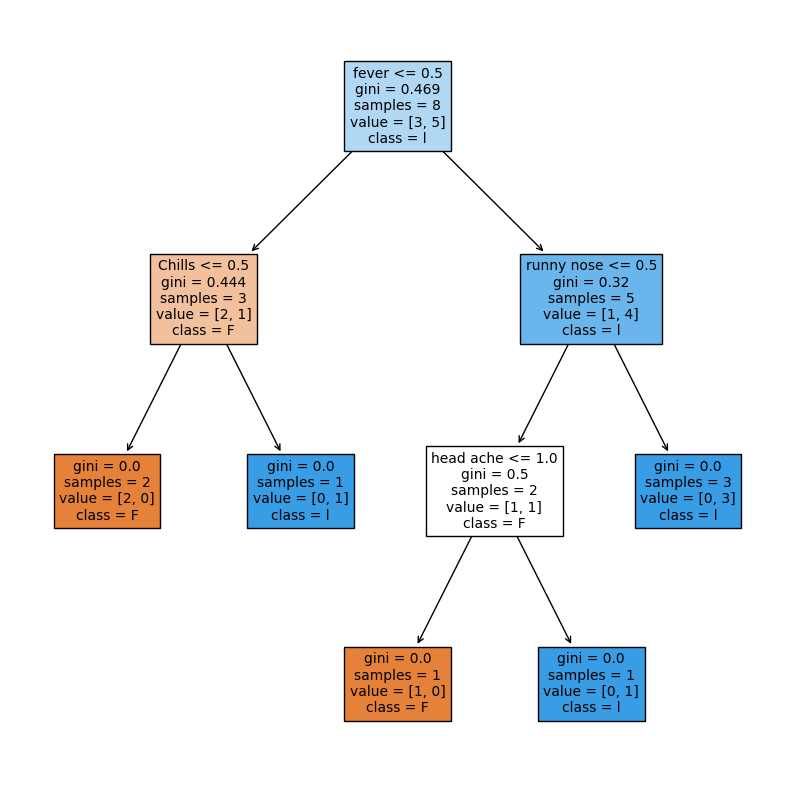

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(lm, feature_names=['Chills', 'runny nose', 'head ache', 'fever'], class_names='Flu', filled=True, impurity=True, fontsize=10)
plt.show()

##**Predicting using a Decision Tree**

**Question 4:** Confirm the prediction result you got using Naive Bayes previously

In [54]:
features=np.array([1,1,1,1])
result=lm.predict([features])
print("does this person has flu?",result)

does this person has flu? [1]


Once again, we get the same result from our DT as our NB algorithm.